#**Problem Statement:**
The purpose of this study is to build a machine learning model that can predict whether the employee will leave the company or not by analyzing its characteristics based on the 'left column.'

#**Import Basic Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# **Importing the CSV file**

In [2]:
df = pd.read_csv("Company Attrition Data.csv")

# **Analysing the Data**

In [3]:
df.shape

(14999, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Sales_Occured          14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [6]:
yes_count=(df['left']==1).sum()
no_count=(df['left']==0).sum()
yes_per= yes_count/len(df)
no_per= no_count/len(df)
print("Percentage of employee who leave=", round(yes_per*100,2))
print("Percentage of employee who will not leave=", round(no_per*100,2))

Percentage of employee who leave= 23.81
Percentage of employee who will not leave= 76.19


Observation:


*   About 15,000 employee observations and 10 features
*   The company had a turnover rate of about 24%
*   Mean satisfaction of employees is 0.61


# **Data Cleaning & Missing value Treatment**

In [7]:
# find missing value
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Sales_Occured            0
salary                   0
dtype: int64

In [8]:
for column in df.columns[:]:
    print(column,": ",df[column].unique())

satisfaction_level :  [0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]
last_evaluation :  [0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]
number_project :  [2 5 7 6 4 3]
average_montly_hours :  [157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 282 147 304 139 158 242 239 128 132

No data cleaning and missing value treatment needed as data is already in a clean form.

# **Exploratory Data Analysis**

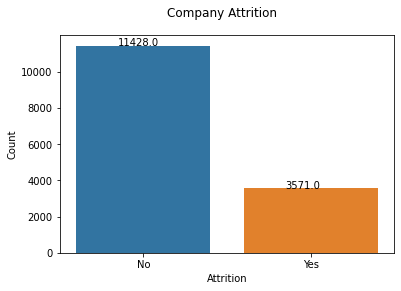

In [10]:
ax=sns.countplot(x='left',data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set_xticklabels(["No","Yes"])
ax.set_ylabel("Count")
ax.set_xlabel("Attrition")
ax.figure.suptitle("Company Attrition")
plt.show()

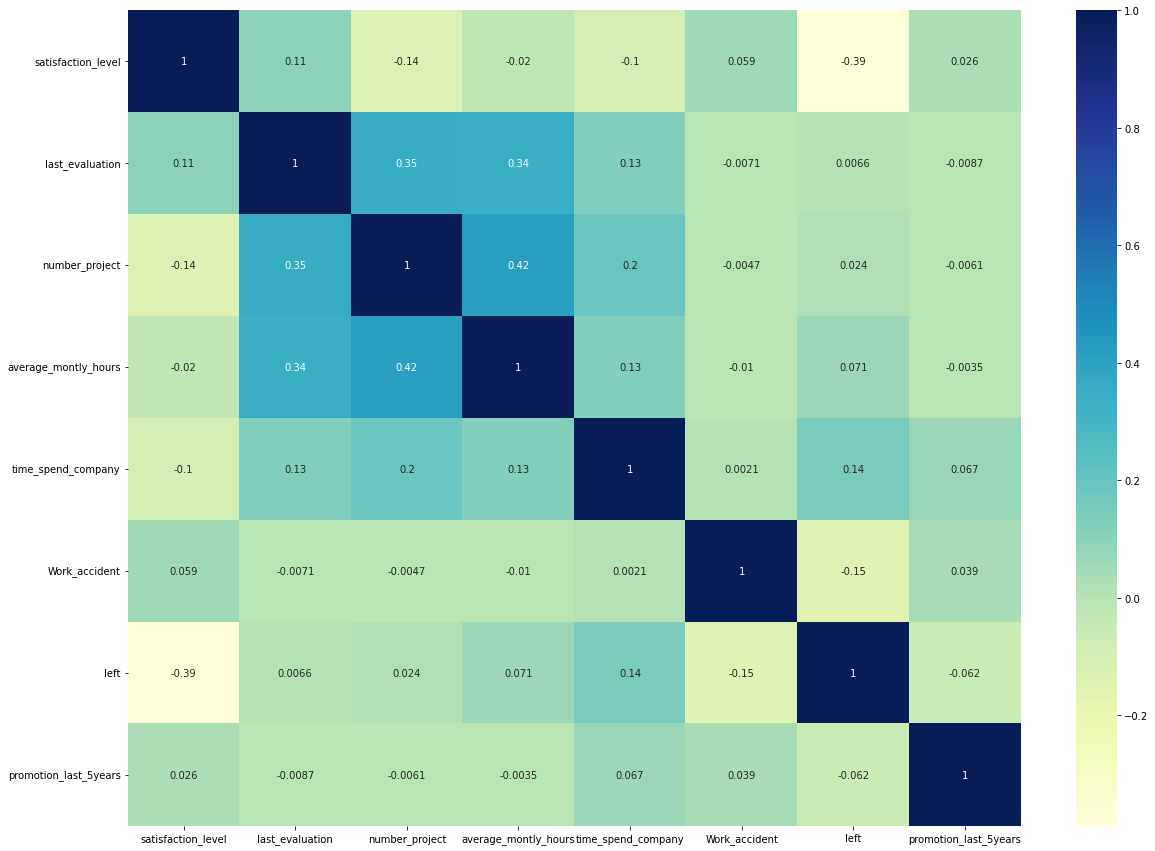

In [11]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [12]:
cor= df.corr()['left']
cor

satisfaction_level      -0.388375
last_evaluation          0.006567
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
Work_accident           -0.154622
left                     1.000000
promotion_last_5years   -0.061788
Name: left, dtype: float64

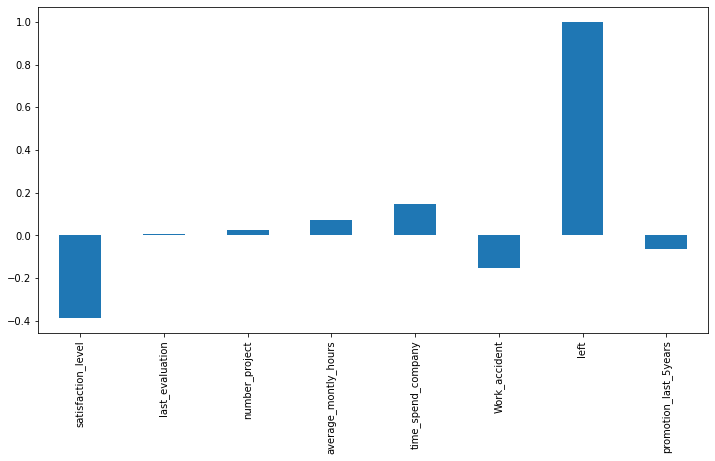

In [13]:
plt.figure(figsize=(12,6))
cor.plot(kind="bar")
plt.show()

Summary:

From the heatmap, we can see there is a negative(-) correlation between 'left' and satisfaction and are highly correlated, which means people tend to leave a company more when they are less satisfied.

In [33]:
col= df.columns
col

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Sales_Occured', 'salary'],
      dtype='object')

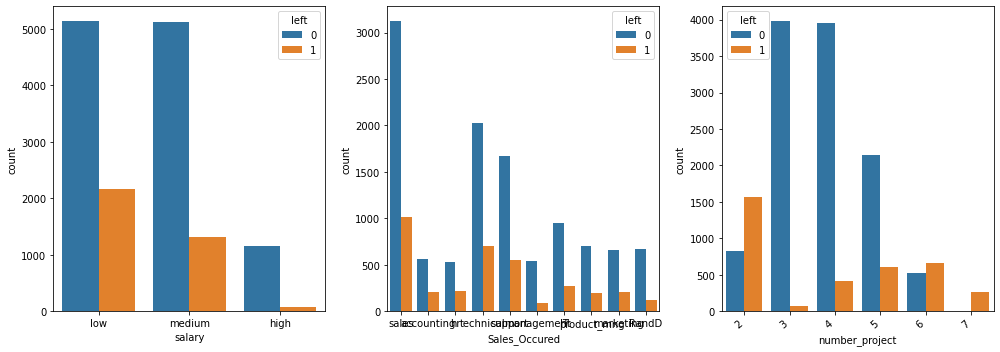

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,5))

sns.countplot(x="salary", hue="left", data=df, ax=axes[0])
sns.countplot(x="Sales_Occured", hue="left", data=df, ax=axes[1])
sns.countplot(x="number_project", hue="left", data=df, ax=axes[2])
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()
plt.show()

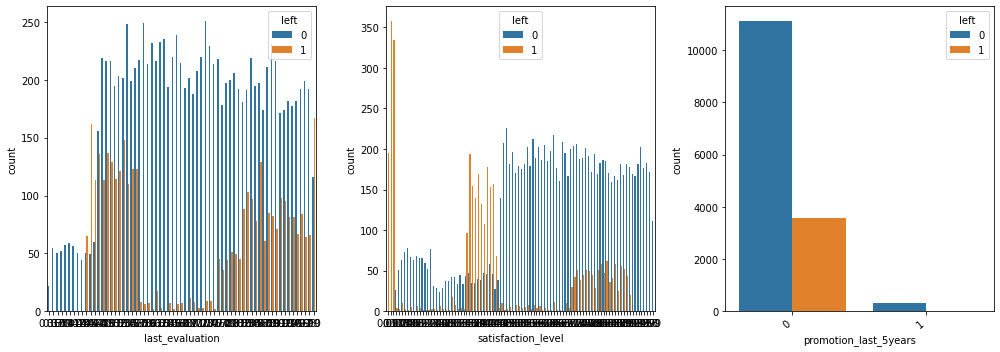

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,5))

sns.countplot(x="last_evaluation", hue="left", data=df, ax=axes[0])
sns.countplot(x="satisfaction_level", hue="left", data=df, ax=axes[1])
sns.countplot(x="promotion_last_5years", hue="left", data=df, ax=axes[2])
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()
plt.show()

# **Encoding the categorical Data**

In [36]:
#cat_col=['Sales_Occured', 'salary']
df = pd.get_dummies(df, drop_first = True)
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Sales_Occured_RandD',
       'Sales_Occured_accounting', 'Sales_Occured_hr',
       'Sales_Occured_management', 'Sales_Occured_marketing',
       'Sales_Occured_product_mng', 'Sales_Occured_sales',
       'Sales_Occured_support', 'Sales_Occured_technical', 'salary_low',
       'salary_medium'],
      dtype='object')

#**Splitting data for training and testing**

In [37]:
x = df_clean.drop(['left'],axis=1)
y = df_clean['left']
print(x.shape)
print(y.shape)

(14999, 18)
(14999,)


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# **Feature Scaling**
**StandardScaler** comes into play when the characteristics of the input dataset differ greatly between their ranges, or simply when they are measured in different units of measure. StandardScaler removes the mean and scales the data to the unit variance

In [38]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
#col= ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Term']
sc.fit_transform(x_train)

array([[-0.33299672, -1.15778093, -1.4550047 , ...,  2.12125861,
        -0.97525603,  1.14967834],
       [ 0.63418845, -1.09919068,  0.96656904, ..., -0.47141824,
        -0.97525603,  1.14967834],
       [ 1.11778104,  0.42415563, -0.64781345, ..., -0.47141824,
        -0.97525603,  1.14967834],
       ...,
       [ 0.31179339,  1.30300928,  0.96656904, ..., -0.47141824,
        -0.97525603,  1.14967834],
       [ 0.67448783, -0.74764922,  0.96656904, ...,  2.12125861,
        -0.97525603, -0.86980851],
       [-0.21209858, -0.22033704,  0.96656904, ..., -0.47141824,
         1.02537177, -0.86980851]])

#**Applying Algorithms**

In [39]:
# Applying GaussianNB Algorithm
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [40]:
test_predict=gnb.predict(x_test)
train_predict=gnb.predict(x_train)

In [41]:
Score_GNB_train=gnb.score(x_train,y_train)
Score_GNB_test=gnb.score(x_test,y_test)
print(Score_GNB_train)
print(Score_GNB_test)

0.7302600247642632
0.7331111111111112


In [42]:
# Applying SVC Algorithm
from sklearn.svm import SVC
model= SVC()
model.fit(x_train,y_train)

SVC()

In [43]:
train_predict_SVC= model.predict(x_train)
test_predict_SVC=model.predict(x_test)

In [44]:
Score_SVC_train=model.score(x_train,y_train)
Score_SVC_test=model.score(x_test,y_test)
print(Score_SVC_train)
print(Score_SVC_test)

0.7813125059529479
0.7895555555555556


In [45]:
# Applying KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [46]:
test_pred_knn=knn.predict(x_test)
train_pred_knn=knn.predict(x_train)

In [47]:
Score_KNN_train=knn.score(x_train,y_train)
Score_KNN_test=knn.score(x_test,y_test)
print(Score_KNN_train)
print(Score_KNN_test)

0.9540908657967425
0.9373333333333334


In [48]:
# Applying DecisionTree Algorithm
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [49]:
train_DT_predict= clf.predict(x_train)
test_DT_predict=clf.predict(x_test)

In [50]:
Score_DT_train=clf.score(x_train,y_train)
Score_DT_test=clf.score(x_test,y_test)
print(Score_DT_train)
print(Score_DT_test)

1.0
0.9777777777777777


In [51]:
# Applying RandomForest Algorithm
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [52]:
train_predict_rfc= rfc.predict(x_train)
test_predict_rfc=rfc.predict(x_test)

In [53]:
Score_RFC_train=rfc.score(x_train,y_train)
Score_RFC_test=rfc.score(x_test,y_test)
print(Score_RFC_train)
print(Score_RFC_test)

0.9999047528336032
0.99


In [54]:
# Applying LogisticRegression Algorithm
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=50)
lg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=50)

In [55]:
y_train_pred = lg.predict(x_train)
y_test_pred = lg.predict(x_test)

In [56]:
Score_LR_train=lg.score(x_train,y_train)
Score_LR_test=lg.score(x_test,y_test)
print(Score_LR_train)
print(Score_LR_test)

0.8008381750642919
0.8024444444444444


In [57]:
from pandas.core.frame import DataFrame
Model_Comparison = DataFrame({
    'Model' : ['Logistic Regression','SVM','KNN','Decision Tree','Random Forest','Gaussian NB'],
    'Scores_test': [Score_LR_test,Score_SVC_test,Score_KNN_test,Score_DT_test,Score_RFC_test,Score_GNB_test],
    'Scores_train': [Score_LR_train,Score_SVC_train,Score_KNN_train,Score_DT_train,Score_RFC_train,Score_GNB_train]
    })
Model_Comparison

Model  Scores_test  Scores_train
0  Logistic Regression     0.802444      0.800838
1                  SVM     0.789556      0.781313
2                  KNN     0.937333      0.954091
3        Decision Tree     0.977778      1.000000
4        Random Forest     0.990000      0.999905
5          Gaussian NB     0.733111      0.730260

In [58]:
Model_Comparison_df = Model_Comparison.sort_values(by= 'Scores_test', ascending=False)
Model_Comparison_df.reset_index()[Model_Comparison_df.columns]

Model  Scores_test  Scores_train
0        Random Forest     0.990000      0.999905
1        Decision Tree     0.977778      1.000000
2                  KNN     0.937333      0.954091
3  Logistic Regression     0.802444      0.800838
4                  SVM     0.789556      0.781313
5          Gaussian NB     0.733111      0.730260

**Random Forest** is giving highest accuracy here, so generating  the classification_report and confusion Matrix for the same.

In [59]:
from sklearn.metrics import classification_report
cr = classification_report(y_train,train_predict_rfc)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7966
           1       1.00      1.00      1.00      2533

    accuracy                           1.00     10499
   macro avg       1.00      1.00      1.00     10499
weighted avg       1.00      1.00      1.00     10499



In [60]:
cr = classification_report(y_test,test_predict_rfc)
print(cr)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3462
           1       0.99      0.97      0.98      1038

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



In [61]:
from sklearn.metrics import confusion_matrix
conf_matix = confusion_matrix(y_test,test_predict_rfc)
conf_matix

array([[3451,   11],
       [  34, 1004]])

In [62]:
rfc.feature_importances_

array([0.31410071, 0.12588824, 0.17466558, 0.15027392, 0.19344152,
       0.00927593, 0.00207508, 0.00176743, 0.00165284, 0.00128814,
       0.00172863, 0.00120725, 0.00128704, 0.00328797, 0.00305424,
       0.00357568, 0.00777707, 0.00365272])

In [63]:
x1=pd.DataFrame(rfc.feature_importances_,columns=["Scores"])
x2=pd.DataFrame(x_train.columns,columns=["Names"])
score_rfc=pd.concat([x2,x1],axis=1)
score_rfc.sort_values("Scores",ascending=False).head()

Names    Scores
0    satisfaction_level  0.314101
4    time_spend_company  0.193442
2        number_project  0.174666
3  average_montly_hours  0.150274
1       last_evaluation  0.125888

# **Conclution**
We can observe that attributes like Employee satisfaction, time spend at Company, number of project handling and evaluation were the biggest factors in determining turnover.So as a solution we can rank employees by their probability of leaving, then allocate a limited incentive budget to the highest probability instances.